In [53]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [112]:
diagnosis = pd.read_csv('./data/diagnosis.csv')
triage = pd.read_csv('./data/triage.csv')
edstays = pd.read_csv('./data/edstays.csv')

In [3]:
diagnosis.head()

,subject_id,stay_id,seq_num,icd_code,icd_version,icd_title
0,10000032,32952584,1,4589,9,HYPOTENSION NOS
1,10000032,32952584,2,7070,9,UNSPECIFIED VIRAL HEPATITIS C WITHOUT HEPATIC ...
2,10000032,32952584,3,V08,9,ASYMPTOMATIC HIV INFECTION
3,10000032,33258284,1,5728,9,"OTH SEQUELA, CHR LIV DIS"
4,10000032,33258284,2,78959,9,OTHER ASCITES


### edstays

In [4]:
edstays.head()

,subject_id,hadm_id,stay_id,intime,outtime,gender,race,arrival_transport,disposition
0,10000032,22595853.0,33258284,6/5/2180 19:17,6/5/2180 23:30,F,WHITE,AMBULANCE,ADMITTED
1,10000032,22841357.0,38112554,26/6/2180 15:54,26/6/2180 21:31,F,WHITE,AMBULANCE,ADMITTED
2,10000032,25742920.0,35968195,5/8/2180 20:58,6/8/2180 1:44,F,WHITE,AMBULANCE,ADMITTED
3,10000032,29079034.0,32952584,22/7/2180 16:24,23/7/2180 5:54,F,WHITE,AMBULANCE,HOME
4,10000032,29079034.0,39399961,23/7/2180 5:54,23/7/2180 14:00,F,WHITE,AMBULANCE,ADMITTED


check the type of each attribute and change the datatype of 'intime' & 'outtime' to datetime

In [22]:
edstays.dtypes

subject_id             int64
hadm_id              float64
stay_id                int64
intime                object
outtime               object
gender                object
race                  object
arrival_transport     object
disposition           object
dtype: object

In [23]:
edstays[["intime", "outtime"]] = edstays[["intime", "outtime"]].apply(pd.to_datetime, infer_datetime_format=True)

In [24]:
edstays.dtypes

subject_id                    int64
hadm_id                     float64
stay_id                       int64
intime               datetime64[ns]
outtime              datetime64[ns]
gender                       object
race                         object
arrival_transport            object
disposition                  object
dtype: object

extract the hour from the intime column (the time the patient arrives) and create a variable with 24 unique values

In [25]:
edstays['intime_hour'] = edstays.intime.apply(lambda x:x.hour)

In [26]:
edstays.head()

,subject_id,hadm_id,stay_id,intime,outtime,gender,race,arrival_transport,disposition,intime_hour
0,10000032,22595853.0,33258284,2180-06-05 19:17:00,2180-06-05 23:30:00,F,WHITE,AMBULANCE,ADMITTED,19
1,10000032,22841357.0,38112554,2180-06-26 15:54:00,2180-06-26 21:31:00,F,WHITE,AMBULANCE,ADMITTED,15
2,10000032,25742920.0,35968195,2180-05-08 20:58:00,2180-06-08 01:44:00,F,WHITE,AMBULANCE,ADMITTED,20
3,10000032,29079034.0,32952584,2180-07-22 16:24:00,2180-07-23 05:54:00,F,WHITE,AMBULANCE,HOME,16
4,10000032,29079034.0,39399961,2180-07-23 05:54:00,2180-07-23 14:00:00,F,WHITE,AMBULANCE,ADMITTED,5


In [31]:
sorted(edstays['intime_hour'].unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

calculate the duration time of a patient in hospital

In [34]:
edstays['time_delta'] = (edstays.outtime - edstays.intime)
edstays['duration_hour'] = (edstays.outtime - edstays.intime)/(pd.Timedelta(hours=1))

In [35]:
edstays.head()

,subject_id,hadm_id,stay_id,intime,outtime,gender,race,arrival_transport,disposition,intime_hour,time_delta,duration_hour
0,10000032,22595853.0,33258284,2180-06-05 19:17:00,2180-06-05 23:30:00,F,WHITE,AMBULANCE,ADMITTED,19,0 days 04:13:00,4.216667
1,10000032,22841357.0,38112554,2180-06-26 15:54:00,2180-06-26 21:31:00,F,WHITE,AMBULANCE,ADMITTED,15,0 days 05:37:00,5.616667
2,10000032,25742920.0,35968195,2180-05-08 20:58:00,2180-06-08 01:44:00,F,WHITE,AMBULANCE,ADMITTED,20,30 days 04:46:00,724.766667
3,10000032,29079034.0,32952584,2180-07-22 16:24:00,2180-07-23 05:54:00,F,WHITE,AMBULANCE,HOME,16,0 days 13:30:00,13.500000
4,10000032,29079034.0,39399961,2180-07-23 05:54:00,2180-07-23 14:00:00,F,WHITE,AMBULANCE,ADMITTED,5,0 days 08:06:00,8.100000


### Triage

In [113]:
triage.head()

,subject_id,stay_id,temperature,heartrate,resprate,o2sat,sbp,dbp,pain,acuity,chiefcomplaint
0,10000032,32952584,97.8,87.0,14.0,97.0,71.0,43.0,7,2.0,Hypotension
1,10000032,33258284,98.4,70.0,16.0,97.0,106.0,63.0,0,3.0,"Abd pain, Abdominal distention"
2,10000032,35968195,99.4,105.0,18.0,96.0,106.0,57.0,10,3.0,"n/v/d, Abd pain"
3,10000032,38112554,98.9,88.0,18.0,97.0,116.0,88.0,10,3.0,Abdominal distention
4,10000032,39399961,98.7,77.0,16.0,98.0,96.0,50.0,13,2.0,"Abdominal distention, Abd pain, LETHAGIC"


In [137]:
len(triage)

440384

In [114]:
triage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447712 entries, 0 to 447711
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   subject_id      447712 non-null  int64  
 1   stay_id         447712 non-null  int64  
 2   temperature     423117 non-null  float64
 3   heartrate       429754 non-null  float64
 4   resprate        426337 non-null  float64
 5   o2sat           426063 non-null  float64
 6   sbp             428487 non-null  float64
 7   dbp             427644 non-null  float64
 8   pain            434095 non-null  object 
 9   acuity          440384 non-null  float64
 10  chiefcomplaint  447689 non-null  object 
dtypes: float64(7), int64(2), object(2)
memory usage: 37.6+ MB


In [115]:
triage = triage[~triage['acuity'].isnull()]
triage.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440384 entries, 0 to 447710
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   subject_id      440384 non-null  int64  
 1   stay_id         440384 non-null  int64  
 2   temperature     422940 non-null  float64
 3   heartrate       429562 non-null  float64
 4   resprate        426151 non-null  float64
 5   o2sat           425872 non-null  float64
 6   sbp             428300 non-null  float64
 7   dbp             427457 non-null  float64
 8   pain            433837 non-null  object 
 9   acuity          440384 non-null  float64
 10  chiefcomplaint  440367 non-null  object 
dtypes: float64(7), int64(2), object(2)
memory usage: 40.3+ MB


In [116]:
print(len(triage['pain'].unique()))
triage['pain'].unique()

875


array(['7', '0', '10', '13', '5', '8', '1', '3', '6', '2', '4',
       'critical', nan, 'unable', '9', 'uta', 'Non-verbal', 'ett', '2-3',
       'moderate', 'u/a', 'ua', 'some', 'Critical', 'UTA', 'c', 'unable ',
       'ok', '>10', '5-6', 'UA', '0-3', '9.5', '5.5', 'denies ', 'yes',
       'denies', '8.5', '3.5', '8.4', 'o', '+', '7.5', '.5', '7-8',
       'leg pain', '"pretty high"', 'pre-hosp', 'uable', '3-4', '4-5',
       'Unresponsive', 'crit', 'Unable', 'alot', '8 9 or 10', '6 ', '1-2',
       '?', ' 0', 'sore', '"15"', '8-9', '15', '15-20', 'u',
       'I dont care', '20', '1.5', '0 ', '5/10', 'pre hosp', 'UTA ', '11',
       '00', '10 ', 'critical ', '"alot"', 'sleeping',
       'Pt states he is unable to give me a number ', 'sedated', '0.5',
       '6-7', 'asleep', 'bad', '___', '4-10', 'Bad', '"a little"', 'NAD',
       'not bad', '12', 'pressure', '"feels like shit"', '069', 'crying',
       '"Bad"', 'mild', 'uto', 'too much', 'total body pain', 'unqble',
       '0-8', '0-'

<AxesSubplot:>

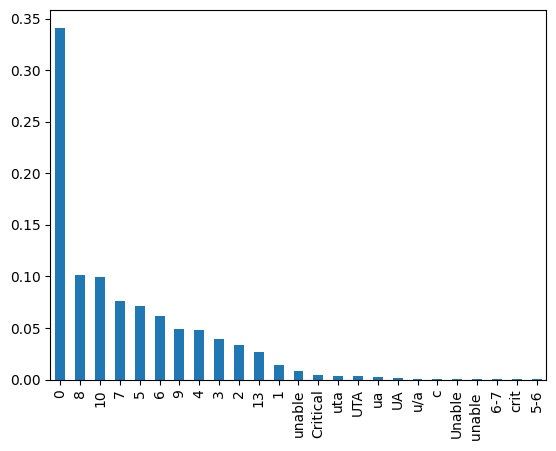

In [117]:
triage['pain'].value_counts(normalize=True).sort_values(ascending=False)[:25].plot.bar()

In [118]:
triage['pain'].value_counts(normalize=True).sort_values(ascending=False)[:16].sum() # Top 16 most frequent values account for 98% of all values

0.9813455283896946

In [119]:
unknown= ['unable','UNABLE','Unable','unable ','uta','UTA','ua','UA','u/a','?']
critical = ['critical','crit','Critical','c']

In [120]:
for i in unknown:
    triage.loc[triage.pain == i, 'pain'] = 'unknown'    # assign the unable the synonyms to unknown
for j in critical:
    triage.loc[triage.pain == j] = 7                    # assign the critical to pain level 7

##### Create triage1 to keep all the accurate integer rows

In [123]:
triage1 = triage[triage['pain'].apply(lambda x: str(x).isdigit())]  # keep only integers values

In [128]:
triage1["pain"] = pd.to_numeric(triage1["pain"])   # change the data type to numeric

C:\Users\jiaxi\AppData\Local\Temp\ipykernel_15768\1918328505.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  triage1["pain"] = pd.to_numeric(triage1["pain"])


In [129]:
triage1 = triage1.drop(triage1[triage1.pain > 10].index)  # drop the value over 10, which are inaccurate values

In [134]:
print(len(triage1['pain'].unique()))
print(triage1['pain'].unique())  # the values 
len(triage1)

11
[ 7  0 10  5  8  1  3  6  2  4  9]


407761

##### Create triage2 to pick out all the unknown rows and merge 2 new triage tables

In [131]:
triage2 = triage.loc[triage['pain'] == 'unknown']

In [132]:
len(triage2)

9928

In [135]:
triage_final = pd.concat([triage1, triage2]) # combine the 2 tables

<AxesSubplot:>

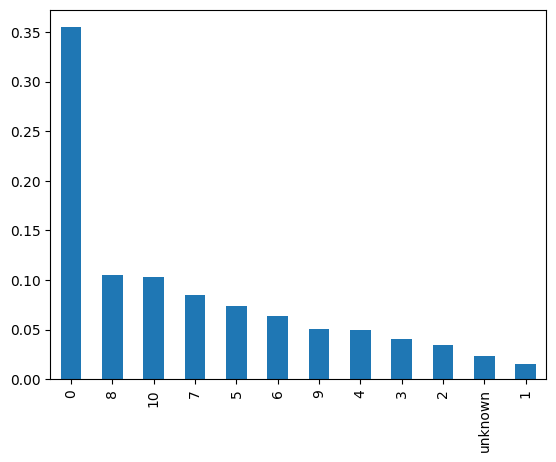

In [136]:
triage_final['pain'].value_counts(normalize=True).sort_values(ascending=False).plot.bar()

In [139]:
len(triage_final)/len(triage)   # The final triage table contains 95% of the original one

0.9484654301700334

### for test (useless)

In [73]:
diagnosis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946692 entries, 0 to 946691
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   subject_id   946692 non-null  int64 
 1   stay_id      946692 non-null  int64 
 2   seq_num      946692 non-null  int64 
 3   icd_code     946692 non-null  object
 4   icd_version  946692 non-null  int64 
 5   icd_title    946692 non-null  object
dtypes: int64(4), object(2)
memory usage: 43.3+ MB


#### word frequency for chief complaint

In [51]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [54]:
def convert(chiefcomplaint):
    # convert chiefcomplaint into word
    word_list = word_tokenize(chiefcomplaint)
    # delete punctuation
    word_list = [word for word in word_list if word.isalpha()]
    # delete meaningless stopwords
    stop_words = set(stopwords.words('english'))
    word_list = [word for word in word_list if word not in stop_words]
    # generate the occurance of each word and covert the data type to dataframe
    word_occurance = pd.value_counts(np.array(word_list))
    vocab_freq = word_occurance.to_frame().reset_index()

    # display the graph and number for that city of the distribution of job_category
    vocab_freq = vocab_freq.iloc[0:19] # select 20 most frequent words
    print(vocab_freq)

    x_category = vocab_freq.iloc[:,0]
    y_category = vocab_freq.iloc[:,1]
    
    y_pos = np.arange(len(x_category))
    plt.figure(figsize = (15,10))
    plt.bar(y_pos,y_category,align = 'center')
    plt.xticks(y_pos, x_category, rotation = 'vertical')
    plt.show()

In [63]:
len(triage)

440384

In [69]:
cc = list(triage['chiefcomplaint'])
cc

['Hypotension',
 'Abd pain, Abdominal distention',
 'n/v/d, Abd pain',
 'Abdominal distention',
 'Abdominal distention, Abd pain, LETHAGIC',
 'Confusion, Hallucinations',
 'Altered mental status, B Pedal edema',
 'L CHEEK ABSCESS',
 'LEFT CHEEK SWELLING, Abscess',
 'L FACIAL SWELLING',
 'Suture removal',
 'Laceration, s/p Fall',
 'Head injury',
 'Throat foreign body sensation',
 'L Hip pain',
 'R Foot pain',
 'ANEMIA S/P FALL',
 'Abd pain',
 'LUQ abd pain',
 'ILI',
 'Vomiting',
 'ETOH',
 'ILI',
 'Dizziness',
 'L Shoulder pain, Visual changes',
 'R HAND INJURY',
 's/p Fall',
 'Abnormal labs, Calf pain',
 'Chest pain',
 'WEAKNESS',
 'VOMITING AND/OR NAUSEA',
 'L LEG SWELLING',
 '"HEAD IS NUMB"',
 'DYSPNEA',
 'R Ankle pain',
 'Hypoglycemia',
 'DYSPNEA',
 'Dyspnea',
 'Dyspnea',
 'L Foot pain',
 'SOB',
 'Dyspnea',
 'R FOOT BOIL',
 'Dyspnea',
 'L Leg numbness',
 'Anemia',
 'Rectal pain',
 'RIGHT ARM SWELLING',
 'ILI',
 'Chest pain, Headache',
 'HEADACHE',
 'FEVER',
 'RLQ abdominal pain',
 'P